In [174]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

In [57]:
df = pd.read_csv("/Users/kevinjoo/Downloads/mta_data_project.csv", sep = "\t")

In [58]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661


In [59]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [60]:
df.columns = ["C/A", "unit", "scp", "station", "linename", "division", "date", "time", "desc", "entries", "exits"]

In [61]:
df["date_time"] = pd.to_datetime(df["date"] + " " + df["time"])

In [62]:
df["turnstiles"] = df["C/A"] + df["unit"] + df["scp"] + "_" + df["station"]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930792 entries, 0 to 2930791
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   C/A         object        
 1   unit        object        
 2   scp         object        
 3   station     object        
 4   linename    object        
 5   division    object        
 6   date        object        
 7   time        object        
 8   desc        object        
 9   entries     int64         
 10  exits       int64         
 11  date_time   datetime64[ns]
 12  turnstiles  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 290.7+ MB


In [64]:
df.groupby(["turnstiles", "date_time"]).entries.count().reset_index().sort_values("entries", ascending=False).head(10)

,turnstiles,date_time,entries
1080469,N213R15400-00-05_TREMONT AV,2021-06-23 05:00:00,2
1261816,N335R15801-00-03_KEW GARDENS,2021-06-20 18:30:00,2
252572,B024R21100-05-00_KINGS HWY,2021-05-02 04:00:00,2
252573,B024R21100-05-00_KINGS HWY,2021-05-02 08:00:00,2
252574,B024R21100-05-00_KINGS HWY,2021-05-02 12:00:00,2
252575,B024R21100-05-00_KINGS HWY,2021-05-02 16:00:00,2
252576,B024R21100-05-00_KINGS HWY,2021-05-02 20:00:00,2
252577,B024R21100-05-00_KINGS HWY,2021-05-03 00:00:00,2
252579,B024R21100-05-00_KINGS HWY,2021-05-03 08:00:00,2
252570,B024R21100-05-00_KINGS HWY,2021-05-01 20:00:00,2


In [65]:
mask = ((df["turnstiles"] == "B024R21100-05-00_KINGS HWY") & (df["date_time"] == "2021-05-02 12:00:00"))

In [66]:
df[mask]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles
2530369,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/02/2021,12:00:00,REGULAR,262152,0,2021-05-02 12:00:00,B024R21100-05-00_KINGS HWY
2530370,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/02/2021,12:00:00,RECOVR AUD,13,0,2021-05-02 12:00:00,B024R21100-05-00_KINGS HWY


In [67]:
mask_2 = ((df["turnstiles"] == "N335R15801-00-03_KEW GARDENS") & (df["date_time"] == "2021-06-20 18:30:00"))

In [68]:
df[mask_2]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles
1137886,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,REGULAR,5201958,17258849,2021-06-20 18:30:00,N335R15801-00-03_KEW GARDENS
1137887,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,5201960,17258853,2021-06-20 18:30:00,N335R15801-00-03_KEW GARDENS


In [69]:
df.shape

(2930792, 13)

In [70]:
df.info(null_counts=True)

/var/folders/lr/f655_5zn7mx5qqp9f_36hm2m0000gn/T/ipykernel_3860/1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930792 entries, 0 to 2930791
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   C/A         2930792 non-null  object        
 1   unit        2930792 non-null  object        
 2   scp         2930792 non-null  object        
 3   station     2930792 non-null  object        
 4   linename    2930792 non-null  object        
 5   division    2930792 non-null  object        
 6   date        2930792 non-null  object        
 7   time        2930792 non-null  object        
 8   desc        2930792 non-null  object        
 9   entries     2930792 non-null  int64         
 10  exits       2930792 non-null  int64         
 11  date_time   2930792 non-null  datetime64[ns]
 12  turnstiles  2930792 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 290.7+ MB


In [71]:
df.drop_duplicates(subset=["turnstiles", "date_time"], inplace=True)

In [72]:
df.shape

(2930742, 13)

In [73]:
df[mask_2]

/var/folders/lr/f655_5zn7mx5qqp9f_36hm2m0000gn/T/ipykernel_3860/3771958429.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[mask_2]


,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles
1137886,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,REGULAR,5201958,17258849,2021-06-20 18:30:00,N335R15801-00-03_KEW GARDENS


In [74]:
df.groupby(["turnstiles", "date_time"]).entries.count().reset_index().sort_values("entries", ascending=False).head(10)

,turnstiles,date_time,entries
0,A002R05102-00-00_59 ST,2021-04-24 00:00:00,1
1953842,R138R29300-03-03_34 ST-PENN STA,2021-07-27 14:00:00,1
1953822,R138R29300-03-03_34 ST-PENN STA,2021-07-23 02:00:00,1
1953823,R138R29300-03-03_34 ST-PENN STA,2021-07-23 06:00:00,1
1953824,R138R29300-03-03_34 ST-PENN STA,2021-07-23 10:00:00,1
1953825,R138R29300-03-03_34 ST-PENN STA,2021-07-23 14:00:00,1
1953826,R138R29300-03-03_34 ST-PENN STA,2021-07-23 18:00:00,1
1953827,R138R29300-03-03_34 ST-PENN STA,2021-07-23 22:00:00,1
1953828,R138R29300-03-03_34 ST-PENN STA,2021-07-24 02:00:00,1
1953829,R138R29300-03-03_34 ST-PENN STA,2021-07-24 06:00:00,1


In [75]:
df.describe()

,entries,exits
count,2.930742e+06,2.930742e+06
mean,4.188533e+07,3.353580e+07
std,2.189202e+08,1.927953e+08
min,0.000000e+00,0.000000e+00
25%,2.168745e+05,9.542900e+04
50%,1.420508e+06,8.587140e+05
75%,6.050762e+06,3.980537e+06
max,2.147430e+09,2.122941e+09


In [76]:
df["entry_traffic"] = df.groupby(["turnstiles", "date", "desc"]).entries.diff(1).fillna(0)
df["exit_traffic"] = df.groupby(["turnstiles", "date", "desc"]).exits.diff(1).fillna(0)
df["total_traffic"] = df["entry_traffic"] + df["exit_traffic"]

In [77]:
df.head()

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554,2021-07-24 00:00:00,A002R05102-00-00_59 ST,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563,2021-07-24 04:00:00,A002R05102-00-00_59 ST,13.0,9.0,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576,2021-07-24 08:00:00,A002R05102-00-00_59 ST,14.0,13.0,27.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619,2021-07-24 12:00:00,A002R05102-00-00_59 ST,38.0,43.0,81.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661,2021-07-24 16:00:00,A002R05102-00-00_59 ST,120.0,42.0,162.0


In [78]:
df.describe()

,entries,exits,entry_traffic,exit_traffic,total_traffic
count,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06
mean,4.188533e+07,3.353580e+07,-1.212463e+02,-5.857596e+02,-7.070059e+02
std,2.189202e+08,1.927953e+08,1.094391e+06,1.573044e+06,2.573480e+06
min,0.000000e+00,0.000000e+00,-9.768675e+08,-1.804896e+09,-2.781764e+09
25%,2.168745e+05,9.542900e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.420508e+06,8.587140e+05,1.300000e+01,1.600000e+01,4.100000e+01
75%,6.050762e+06,3.980537e+06,7.400000e+01,7.200000e+01,1.650000e+02
max,2.147430e+09,2.122941e+09,1.179009e+09,1.169855e+09,2.315419e+09


In [79]:
df[df["total_traffic"] < -1000000].head()

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
56828,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,16:00:00,REGULAR,0,9,2021-07-30 16:00:00,N070R01204-05-01_34 ST-PENN STA,-117440512.0,-540.0,-117441052.0
65725,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,16:00:00,REGULAR,327820,62,2021-07-24 16:00:00,N103R12700-06-01_JAY ST-METROTEC,-7249292.0,-2004636.0,-9253928.0
156556,R221,R170,01-00-01,14 ST-UNION SQ,456LNQRW,IRT,07/24/2021,21:00:00,REGULAR,114,69,2021-07-24 21:00:00,R221R17001-00-01_14 ST-UNION SQ,-1953459.0,-858300.0,-2811759.0
268881,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,07/20/2021,21:00:00,REGULAR,83,306,2021-07-20 21:00:00,N080R13800-00-00_W 4 ST-WASH SQ,-367080.0,-1151036.0,-1518116.0
281868,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,16:00:00,REGULAR,327682,0,2021-07-17 16:00:00,N181AR46400-05-00_AQUEDUCT RACETR,-66781958.0,-538.0,-66782496.0


In [80]:
df.loc[56825:56835]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
56825,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,04:00:00,REGULAR,117440512,549,2021-07-30 04:00:00,N070R01204-05-01_34 ST-PENN STA,0.0,0.0,0.0
56826,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,08:00:00,REGULAR,117440512,549,2021-07-30 08:00:00,N070R01204-05-01_34 ST-PENN STA,0.0,0.0,0.0
56827,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,12:00:00,REGULAR,117440512,549,2021-07-30 12:00:00,N070R01204-05-01_34 ST-PENN STA,0.0,0.0,0.0
56828,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,16:00:00,REGULAR,0,9,2021-07-30 16:00:00,N070R01204-05-01_34 ST-PENN STA,-117440512.0,-540.0,-117441052.0
56829,N070,R012,04-05-01,34 ST-PENN STA,ACE,IND,07/30/2021,20:00:00,REGULAR,0,9,2021-07-30 20:00:00,N070R01204-05-01_34 ST-PENN STA,0.0,0.0,0.0
56830,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/24/2021,00:00:00,REGULAR,6372001,18038627,2021-07-24 00:00:00,N071R01300-00-00_34 ST-PENN STA,0.0,0.0,0.0
56831,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/24/2021,04:00:00,REGULAR,6372005,18038695,2021-07-24 04:00:00,N071R01300-00-00_34 ST-PENN STA,4.0,68.0,72.0
56832,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/24/2021,08:00:00,REGULAR,6372022,18038845,2021-07-24 08:00:00,N071R01300-00-00_34 ST-PENN STA,17.0,150.0,167.0
56833,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/24/2021,12:00:00,REGULAR,6372134,18039250,2021-07-24 12:00:00,N071R01300-00-00_34 ST-PENN STA,112.0,405.0,517.0
56834,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,07/24/2021,16:00:00,REGULAR,6372260,18039865,2021-07-24 16:00:00,N071R01300-00-00_34 ST-PENN STA,126.0,615.0,741.0


In [81]:
df.loc[281860:281875]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
281860,N181,R357,00-06-01,AQUEDUCT N.COND,A,IND,07/23/2021,09:00:00,REGULAR,463103,94122,2021-07-23 09:00:00,N181R35700-06-01_AQUEDUCT N.COND,4.0,32.0,36.0
281861,N181,R357,00-06-01,AQUEDUCT N.COND,A,IND,07/23/2021,13:00:00,REGULAR,463104,94239,2021-07-23 13:00:00,N181R35700-06-01_AQUEDUCT N.COND,1.0,117.0,118.0
281862,N181,R357,00-06-01,AQUEDUCT N.COND,A,IND,07/23/2021,17:00:00,REGULAR,463109,94397,2021-07-23 17:00:00,N181R35700-06-01_AQUEDUCT N.COND,5.0,158.0,163.0
281863,N181,R357,00-06-01,AQUEDUCT N.COND,A,IND,07/23/2021,21:00:00,REGULAR,463114,94524,2021-07-23 21:00:00,N181R35700-06-01_AQUEDUCT N.COND,5.0,127.0,132.0
281864,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,00:00:00,REGULAR,67109640,538,2021-07-17 00:00:00,N181AR46400-05-00_AQUEDUCT RACETR,0.0,0.0,0.0
281865,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,04:00:00,REGULAR,67109640,538,2021-07-17 04:00:00,N181AR46400-05-00_AQUEDUCT RACETR,0.0,0.0,0.0
281866,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,08:00:00,REGULAR,67109640,538,2021-07-17 08:00:00,N181AR46400-05-00_AQUEDUCT RACETR,0.0,0.0,0.0
281867,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,12:00:00,REGULAR,67109640,538,2021-07-17 12:00:00,N181AR46400-05-00_AQUEDUCT RACETR,0.0,0.0,0.0
281868,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,16:00:00,REGULAR,327682,0,2021-07-17 16:00:00,N181AR46400-05-00_AQUEDUCT RACETR,-66781958.0,-538.0,-66782496.0
281869,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/17/2021,20:00:00,REGULAR,327682,0,2021-07-17 20:00:00,N181AR46400-05-00_AQUEDUCT RACETR,0.0,0.0,0.0


In [82]:
df[df["entry_traffic"] < -1000000].count()

C/A              40
unit             40
scp              40
station          40
linename         40
division         40
date             40
time             40
desc             40
entries          40
exits            40
date_time        40
turnstiles       40
entry_traffic    40
exit_traffic     40
total_traffic    40
dtype: int64

In [83]:
df[df["exit_traffic"] < -1000000].count()

C/A              34
unit             34
scp              34
station          34
linename         34
division         34
date             34
time             34
desc             34
entries          34
exits            34
date_time        34
turnstiles       34
entry_traffic    34
exit_traffic     34
total_traffic    34
dtype: int64

In [84]:
df[df["exit_traffic"] < -1000000].head()

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
65725,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,16:00:00,REGULAR,327820,62,2021-07-24 16:00:00,N103R12700-06-01_JAY ST-METROTEC,-7249292.0,-2004636.0,-9253928.0
268881,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,07/20/2021,21:00:00,REGULAR,83,306,2021-07-20 21:00:00,N080R13800-00-00_W 4 ST-WASH SQ,-367080.0,-1151036.0,-1518116.0
285531,N205,R195,02-00-03,161/YANKEE STAD,BD4,IND,07/22/2021,20:22:00,REGULAR,46,50,2021-07-22 20:22:00,N205R19502-00-03_161/YANKEE STAD,-5405491.0,-1851962.0,-7257453.0
768502,R141,R031,00-03-01,34 ST-PENN STA,123,IRT,07/09/2021,16:00:00,REGULAR,9,0,2021-07-09 16:00:00,R141R03100-03-01_34 ST-PENN STA,-380641.0,-2974479.0,-3355120.0
798692,R261,R205,00-00-01,149/GRAND CONC,245,IRT,07/07/2021,12:00:00,REGULAR,196713,111,2021-07-07 12:00:00,R261R20500-00-01_149/GRAND CONC,-1694313.0,-1958113.0,-3652426.0


In [85]:
df.loc[65720:65730]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
65720,N103,R127,00-06-00,JAY ST-METROTEC,ACF,IND,07/30/2021,20:00:00,REGULAR,1402924,225899,2021-07-30 20:00:00,N103R12700-06-00_JAY ST-METROTEC,270.0,66.0,336.0
65721,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,00:00:00,REGULAR,7577096,2004689,2021-07-24 00:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65722,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,04:00:00,REGULAR,7577106,2004694,2021-07-24 04:00:00,N103R12700-06-01_JAY ST-METROTEC,10.0,5.0,15.0
65723,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,08:00:00,REGULAR,7577112,2004698,2021-07-24 08:00:00,N103R12700-06-01_JAY ST-METROTEC,6.0,4.0,10.0
65724,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,12:00:00,RECOVR AUD,327680,0,2021-07-24 12:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65725,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,16:00:00,REGULAR,327820,62,2021-07-24 16:00:00,N103R12700-06-01_JAY ST-METROTEC,-7249292.0,-2004636.0,-9253928.0
65726,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,20:00:00,REGULAR,327975,106,2021-07-24 20:00:00,N103R12700-06-01_JAY ST-METROTEC,155.0,44.0,199.0
65727,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,00:00:00,REGULAR,328039,128,2021-07-25 00:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65728,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,04:00:00,REGULAR,328047,135,2021-07-25 04:00:00,N103R12700-06-01_JAY ST-METROTEC,8.0,7.0,15.0
65729,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,08:00:00,REGULAR,328050,140,2021-07-25 08:00:00,N103R12700-06-01_JAY ST-METROTEC,3.0,5.0,8.0


In [96]:
df.loc[df["entry_traffic"] < -1000000, "entry_traffic"] = 0
df.loc[df["exit_traffic"] < -1000000, "exit_traffic"] = 0

In [97]:
df["total_traffic"] = df["entry_traffic"] + df["exit_traffic"]

In [98]:
df.loc[65720:65730]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
65720,N103,R127,00-06-00,JAY ST-METROTEC,ACF,IND,07/30/2021,20:00:00,REGULAR,1402924,225899,2021-07-30 20:00:00,N103R12700-06-00_JAY ST-METROTEC,270.0,66.0,336.0
65721,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,00:00:00,REGULAR,7577096,2004689,2021-07-24 00:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65722,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,04:00:00,REGULAR,7577106,2004694,2021-07-24 04:00:00,N103R12700-06-01_JAY ST-METROTEC,10.0,5.0,15.0
65723,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,08:00:00,REGULAR,7577112,2004698,2021-07-24 08:00:00,N103R12700-06-01_JAY ST-METROTEC,6.0,4.0,10.0
65724,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,12:00:00,RECOVR AUD,327680,0,2021-07-24 12:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65725,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,16:00:00,REGULAR,327820,62,2021-07-24 16:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65726,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/24/2021,20:00:00,REGULAR,327975,106,2021-07-24 20:00:00,N103R12700-06-01_JAY ST-METROTEC,155.0,44.0,199.0
65727,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,00:00:00,REGULAR,328039,128,2021-07-25 00:00:00,N103R12700-06-01_JAY ST-METROTEC,0.0,0.0,0.0
65728,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,04:00:00,REGULAR,328047,135,2021-07-25 04:00:00,N103R12700-06-01_JAY ST-METROTEC,8.0,7.0,15.0
65729,N103,R127,00-06-01,JAY ST-METROTEC,ACF,IND,07/25/2021,08:00:00,REGULAR,328050,140,2021-07-25 08:00:00,N103R12700-06-01_JAY ST-METROTEC,3.0,5.0,8.0


In [99]:
df[df["entry_traffic"] < -1000000].count()

C/A              0
unit             0
scp              0
station          0
linename         0
division         0
date             0
time             0
desc             0
entries          0
exits            0
date_time        0
turnstiles       0
entry_traffic    0
exit_traffic     0
total_traffic    0
dtype: int64

In [100]:
df[df["exit_traffic"] < -1000000].count()

C/A              0
unit             0
scp              0
station          0
linename         0
division         0
date             0
time             0
desc             0
entries          0
exits            0
date_time        0
turnstiles       0
entry_traffic    0
exit_traffic     0
total_traffic    0
dtype: int64

In [101]:
df.describe()

,entries,exits,entry_traffic,exit_traffic,total_traffic
count,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06
mean,4.188533e+07,3.353580e+07,7.877416e+02,8.706863e+02,1.658428e+03
std,2.189202e+08,1.927953e+08,7.950709e+05,9.528922e+05,1.728744e+06
min,0.000000e+00,0.000000e+00,-9.516420e+05,-9.953070e+05,-1.664051e+06
25%,2.168745e+05,9.542900e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.420508e+06,8.587140e+05,1.300000e+01,1.600000e+01,4.100000e+01
75%,6.050762e+06,3.980537e+06,7.400000e+01,7.200000e+01,1.650000e+02
max,2.147430e+09,2.122941e+09,1.179009e+09,1.169855e+09,2.315419e+09


In [106]:
df[df["entry_traffic"] < -100000].count()

C/A              43
unit             43
scp              43
station          43
linename         43
division         43
date             43
time             43
desc             43
entries          43
exits            43
date_time        43
turnstiles       43
entry_traffic    43
exit_traffic     43
total_traffic    43
dtype: int64

In [107]:
df[df["entry_traffic"] < -100000].head()

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
64104,N098,R028,00-02-01,FULTON ST,2345ACJZ,IND,07/27/2021,15:00:00,REGULAR,10,2,2021-07-27 15:00:00,N098R02800-02-01_FULTON ST,-500609.0,-477313.0,-977922.0
129695,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,19:26:26,REGULAR,1,14,2021-07-25 19:26:26,PTH22R54000-04-00_PATH NEW WTC,-146226.0,-346546.0,-492772.0
268881,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,07/20/2021,21:00:00,REGULAR,83,306,2021-07-20 21:00:00,N080R13800-00-00_W 4 ST-WASH SQ,-367080.0,0.0,-367080.0
338536,PTH22,R540,00-01-05,PATH NEW WTC,1,PTH,07/21/2021,18:49:08,REGULAR,75,245,2021-07-21 18:49:08,PTH22R54000-01-05_PATH NEW WTC,-226579.0,-234731.0,-461310.0
339023,PTH22,R540,00-03-01,PATH NEW WTC,1,PTH,07/22/2021,20:14:12,REGULAR,108,36,2021-07-22 20:14:12,PTH22R54000-03-01_PATH NEW WTC,-277775.0,-238639.0,-516414.0


In [110]:
df.loc[129690:129700]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
129690,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/24/2021,22:31:45,REGULAR,146227,346465,2021-07-24 22:31:45,PTH22R54000-04-00_PATH NEW WTC,6.0,44.0,50.0
129691,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,02:43:45,REGULAR,146227,346477,2021-07-25 02:43:45,PTH22R54000-04-00_PATH NEW WTC,0.0,0.0,0.0
129692,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,06:55:45,REGULAR,146227,346486,2021-07-25 06:55:45,PTH22R54000-04-00_PATH NEW WTC,0.0,9.0,9.0
129693,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,11:07:45,REGULAR,146227,346519,2021-07-25 11:07:45,PTH22R54000-04-00_PATH NEW WTC,0.0,33.0,33.0
129694,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,15:19:45,REGULAR,146227,346560,2021-07-25 15:19:45,PTH22R54000-04-00_PATH NEW WTC,0.0,41.0,41.0
129695,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,19:26:26,REGULAR,1,14,2021-07-25 19:26:26,PTH22R54000-04-00_PATH NEW WTC,-146226.0,-346546.0,-492772.0
129696,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,23:38:26,REGULAR,2,30,2021-07-25 23:38:26,PTH22R54000-04-00_PATH NEW WTC,1.0,16.0,17.0
129697,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,03:50:26,REGULAR,3,31,2021-07-26 03:50:26,PTH22R54000-04-00_PATH NEW WTC,0.0,0.0,0.0
129698,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,08:02:26,REGULAR,3,170,2021-07-26 08:02:26,PTH22R54000-04-00_PATH NEW WTC,0.0,139.0,139.0
129699,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,12:14:26,REGULAR,4,353,2021-07-26 12:14:26,PTH22R54000-04-00_PATH NEW WTC,1.0,183.0,184.0


In [109]:
df[df["exit_traffic"] < -100000].count()

C/A              55
unit             55
scp              55
station          55
linename         55
division         55
date             55
time             55
desc             55
entries          55
exits            55
date_time        55
turnstiles       55
entry_traffic    55
exit_traffic     55
total_traffic    55
dtype: int64

In [111]:
df[df["exit_traffic"] < -100000].head()

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
64104,N098,R028,00-02-01,FULTON ST,2345ACJZ,IND,07/27/2021,15:00:00,REGULAR,10,2,2021-07-27 15:00:00,N098R02800-02-01_FULTON ST,-500609.0,-477313.0,-977922.0
86095,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,16:00:00,REGULAR,16777220,13,2021-07-26 16:00:00,N325AR21800-00-00_ELMHURST AV,15740059.0,-416015.0,15324044.0
128161,PTH20,R549,03-01-08,NEWARK HM HE,1,PTH,07/30/2021,12:50:15,REGULAR,835,31961,2021-07-30 12:50:15,PTH20R54903-01-08_NEWARK HM HE,-2156.0,-333039.0,-335195.0
129695,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,19:26:26,REGULAR,1,14,2021-07-25 19:26:26,PTH22R54000-04-00_PATH NEW WTC,-146226.0,-346546.0,-492772.0
130055,PTH22,R540,00-05-02,PATH NEW WTC,1,PTH,07/25/2021,19:37:49,REGULAR,2,1,2021-07-25 19:37:49,PTH22R54000-05-02_PATH NEW WTC,-36605.0,-132641.0,-169246.0


In [112]:
df.loc[86090:86100]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
86090,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/25/2021,20:00:00,REGULAR,1037157,415998,2021-07-25 20:00:00,N325AR21800-00-00_ELMHURST AV,1.0,6.0,7.0
86091,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,00:00:00,REGULAR,1037158,416008,2021-07-26 00:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86092,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,04:00:00,REGULAR,1037158,416012,2021-07-26 04:00:00,N325AR21800-00-00_ELMHURST AV,0.0,4.0,4.0
86093,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,08:00:00,REGULAR,1037159,416015,2021-07-26 08:00:00,N325AR21800-00-00_ELMHURST AV,1.0,3.0,4.0
86094,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,12:00:00,REGULAR,1037161,416028,2021-07-26 12:00:00,N325AR21800-00-00_ELMHURST AV,2.0,13.0,15.0
86095,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,16:00:00,REGULAR,16777220,13,2021-07-26 16:00:00,N325AR21800-00-00_ELMHURST AV,15740059.0,-416015.0,15324044.0
86096,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,20:00:00,REGULAR,16777220,13,2021-07-26 20:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86097,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,00:00:00,REGULAR,16777220,13,2021-07-27 00:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86098,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,04:00:00,REGULAR,16777220,13,2021-07-27 04:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86099,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,08:00:00,REGULAR,16777220,13,2021-07-27 08:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0


In [188]:
df.loc[df["entry_traffic"] <= -1, "entry_traffic"] = 0
df.loc[df["exit_traffic"] <= -1, "exit_traffic"] = 0
df["total_traffic"] = df["entry_traffic"] + df["exit_traffic"]

#the turnstile collects data cumulativly so therefore having a negative balance wouldn't make anysense unless the counter got reset.
#If the counter reset, then the value should start at 0 as a starting point 

In [114]:
df.loc[129690:129700]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
129690,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/24/2021,22:31:45,REGULAR,146227,346465,2021-07-24 22:31:45,PTH22R54000-04-00_PATH NEW WTC,6.0,44.0,50.0
129691,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,02:43:45,REGULAR,146227,346477,2021-07-25 02:43:45,PTH22R54000-04-00_PATH NEW WTC,0.0,0.0,0.0
129692,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,06:55:45,REGULAR,146227,346486,2021-07-25 06:55:45,PTH22R54000-04-00_PATH NEW WTC,0.0,9.0,9.0
129693,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,11:07:45,REGULAR,146227,346519,2021-07-25 11:07:45,PTH22R54000-04-00_PATH NEW WTC,0.0,33.0,33.0
129694,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,15:19:45,REGULAR,146227,346560,2021-07-25 15:19:45,PTH22R54000-04-00_PATH NEW WTC,0.0,41.0,41.0
129695,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,19:26:26,REGULAR,1,14,2021-07-25 19:26:26,PTH22R54000-04-00_PATH NEW WTC,0.0,0.0,0.0
129696,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/25/2021,23:38:26,REGULAR,2,30,2021-07-25 23:38:26,PTH22R54000-04-00_PATH NEW WTC,1.0,16.0,17.0
129697,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,03:50:26,REGULAR,3,31,2021-07-26 03:50:26,PTH22R54000-04-00_PATH NEW WTC,0.0,0.0,0.0
129698,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,08:02:26,REGULAR,3,170,2021-07-26 08:02:26,PTH22R54000-04-00_PATH NEW WTC,0.0,139.0,139.0
129699,PTH22,R540,00-04-00,PATH NEW WTC,1,PTH,07/26/2021,12:14:26,REGULAR,4,353,2021-07-26 12:14:26,PTH22R54000-04-00_PATH NEW WTC,1.0,183.0,184.0


In [189]:
df.describe()

,entries,exits,entry_traffic,exit_traffic,total_traffic
count,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06
mean,4.188533e+07,3.353580e+07,5.287734e+01,5.782324e+01,1.107006e+02
std,2.189202e+08,1.927953e+08,8.469557e+01,9.932552e+01,1.563889e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.168745e+05,9.542900e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.420508e+06,8.587140e+05,1.300000e+01,1.600000e+01,4.200000e+01
75%,6.050762e+06,3.980537e+06,7.400000e+01,7.200000e+01,1.650000e+02
max,2.147430e+09,2.122941e+09,9.970000e+02,1.000000e+03,1.809000e+03


In [116]:
df.loc[86090:86100]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
86090,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/25/2021,20:00:00,REGULAR,1037157,415998,2021-07-25 20:00:00,N325AR21800-00-00_ELMHURST AV,1.0,6.0,7.0
86091,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,00:00:00,REGULAR,1037158,416008,2021-07-26 00:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86092,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,04:00:00,REGULAR,1037158,416012,2021-07-26 04:00:00,N325AR21800-00-00_ELMHURST AV,0.0,4.0,4.0
86093,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,08:00:00,REGULAR,1037159,416015,2021-07-26 08:00:00,N325AR21800-00-00_ELMHURST AV,1.0,3.0,4.0
86094,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,12:00:00,REGULAR,1037161,416028,2021-07-26 12:00:00,N325AR21800-00-00_ELMHURST AV,2.0,13.0,15.0
86095,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,16:00:00,REGULAR,16777220,13,2021-07-26 16:00:00,N325AR21800-00-00_ELMHURST AV,15740059.0,0.0,15740059.0
86096,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,20:00:00,REGULAR,16777220,13,2021-07-26 20:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86097,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,00:00:00,REGULAR,16777220,13,2021-07-27 00:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86098,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,04:00:00,REGULAR,16777220,13,2021-07-27 04:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0
86099,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/27/2021,08:00:00,REGULAR,16777220,13,2021-07-27 08:00:00,N325AR21800-00-00_ELMHURST AV,0.0,0.0,0.0


In [119]:
df[df["total_traffic"] > 1000000]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
86095,N325A,R218,00-00-00,ELMHURST AV,MR,IND,07/26/2021,16:00:00,REGULAR,16777220,13,2021-07-26 16:00:00,N325AR21800-00-00_ELMHURST AV,1.574006e+07,0.000000e+00,1.574006e+07
700563,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,07/09/2021,12:00:00,REGULAR,67109632,538,2021-07-09 12:00:00,N181AR46400-05-00_AQUEDUCT RACETR,6.710962e+07,3.020000e+02,6.710992e+07
1121710,N192,R336,00-00-01,BEACH 60 ST,A,IND,06/22/2021,12:00:00,REGULAR,12517553,14090469,2021-06-22 12:00:00,N192R33600-00-01_BEACH 60 ST,1.251741e+07,1.409024e+07,2.660765e+07
1543670,N217,R112,00-00-02,FORDHAM RD,BD,IND,06/07/2021,12:00:00,REGULAR,687970041,1174467459,2021-06-07 12:00:00,N217R11200-00-02_FORDHAM RD,6.684988e+08,1.169855e+09,1.838354e+09
1598585,R107,R305,00-03-02,WTC-CORTLANDT,1,IRT,06/05/2021,05:00:00,REGULAR,1418346,105859,2021-06-05 05:00:00,R107R30500-03-02_WTC-CORTLANDT,1.114112e+06,4.000000e+00,1.114116e+06
1792618,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,06/01/2021,09:00:00,REGULAR,36880392,0,2021-06-01 09:00:00,N702R57200-05-00_96 ST-2 AVE,3.688039e+07,0.000000e+00,3.688039e+07
1866042,R520,R223,01-06-00,46 ST BLISS ST,7,IRT,06/03/2021,12:00:00,REGULAR,13942393,6714230,2021-06-03 12:00:00,R520R22301-06-00_46 ST BLISS ST,5.043347e+06,4.596317e+06,9.639664e+06
1941812,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,05/24/2021,11:47:10,REGULAR,6349790,17942019,2021-05-24 11:47:10,N071R01300-00-00_34 ST-PENN STA,6.098872e+06,1.718083e+07,2.327970e+07
1941855,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,11:47:10,REGULAR,3500758,7791164,2021-05-24 11:47:10,N071R01300-00-01_34 ST-PENN STA,9.036970e+05,5.156426e+06,6.060123e+06
1941897,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,05/24/2021,08:00:00,REGULAR,8986986,11186662,2021-05-24 08:00:00,N071R01300-00-02_34 ST-PENN STA,8.957879e+06,1.111312e+07,2.007100e+07


In [120]:
df.loc[1941850:1941860]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
1941850,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/23/2021,16:00:00,REGULAR,3500659,7790634,2021-05-23 16:00:00,N071R01300-00-01_34 ST-PENN STA,43.0,226.0,269.0
1941851,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/23/2021,20:00:00,REGULAR,3500692,7790844,2021-05-23 20:00:00,N071R01300-00-01_34 ST-PENN STA,33.0,210.0,243.0
1941852,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,00:00:00,REGULAR,3500719,7790906,2021-05-24 00:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0
1941853,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,04:00:00,REGULAR,3500726,7790914,2021-05-24 04:00:00,N071R01300-00-01_34 ST-PENN STA,7.0,8.0,15.0
1941854,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,08:00:00,REGULAR,2597061,2634738,2021-05-24 08:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0
1941855,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,11:47:10,REGULAR,3500758,7791164,2021-05-24 11:47:10,N071R01300-00-01_34 ST-PENN STA,903697.0,5156426.0,6060123.0
1941856,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,12:00:00,REGULAR,3500761,7791172,2021-05-24 12:00:00,N071R01300-00-01_34 ST-PENN STA,3.0,8.0,11.0
1941857,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,16:00:00,REGULAR,3500807,7791308,2021-05-24 16:00:00,N071R01300-00-01_34 ST-PENN STA,46.0,136.0,182.0
1941858,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,20:00:00,REGULAR,3500858,7791427,2021-05-24 20:00:00,N071R01300-00-01_34 ST-PENN STA,51.0,119.0,170.0
1941859,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/25/2021,00:00:00,REGULAR,3500870,7791461,2021-05-25 00:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0


In [135]:
df["turnstiles"].unique().shape

(5031,)

In [136]:
df.loc[df["entry_traffic"] >= 1000, "entry_traffic"] = 0
df.loc[df["exit_traffic"] > 1000, "exit_traffic"] = 0
df["total_traffic"] = df["entry_traffic"] + df["exit_traffic"]

In [137]:
df.loc[1941850:1941860]

,C/A,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,turnstiles,entry_traffic,exit_traffic,total_traffic
1941850,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/23/2021,16:00:00,REGULAR,3500659,7790634,2021-05-23 16:00:00,N071R01300-00-01_34 ST-PENN STA,43.0,226.0,269.0
1941851,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/23/2021,20:00:00,REGULAR,3500692,7790844,2021-05-23 20:00:00,N071R01300-00-01_34 ST-PENN STA,33.0,210.0,243.0
1941852,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,00:00:00,REGULAR,3500719,7790906,2021-05-24 00:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0
1941853,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,04:00:00,REGULAR,3500726,7790914,2021-05-24 04:00:00,N071R01300-00-01_34 ST-PENN STA,7.0,8.0,15.0
1941854,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,08:00:00,REGULAR,2597061,2634738,2021-05-24 08:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0
1941855,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,11:47:10,REGULAR,3500758,7791164,2021-05-24 11:47:10,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0
1941856,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,12:00:00,REGULAR,3500761,7791172,2021-05-24 12:00:00,N071R01300-00-01_34 ST-PENN STA,3.0,8.0,11.0
1941857,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,16:00:00,REGULAR,3500807,7791308,2021-05-24 16:00:00,N071R01300-00-01_34 ST-PENN STA,46.0,136.0,182.0
1941858,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/24/2021,20:00:00,REGULAR,3500858,7791427,2021-05-24 20:00:00,N071R01300-00-01_34 ST-PENN STA,51.0,119.0,170.0
1941859,N071,R013,00-00-01,34 ST-PENN STA,ACE,IND,05/25/2021,00:00:00,REGULAR,3500870,7791461,2021-05-25 00:00:00,N071R01300-00-01_34 ST-PENN STA,0.0,0.0,0.0


In [138]:
busy_10 = df.groupby("station").agg({"total_traffic": sum}).sort_values("total_traffic", ascending=False).head(10)

In [149]:
busy_10.reset_index(inplace=True)

In [150]:
busy_10

,station,total_traffic
0,34 ST-PENN STA,8280971.0
1,34 ST-HERALD SQ,6307690.0
2,GRD CNTRL-42 ST,6115308.0
3,86 ST,5731813.0
4,14 ST-UNION SQ,5596608.0
5,23 ST,5148084.0
6,125 ST,5122577.0
7,42 ST-PORT AUTH,4547360.0
8,FULTON ST,4525097.0
9,TIMES SQ-42 ST,4383740.0


In [140]:
df.describe()

,entries,exits,entry_traffic,exit_traffic,total_traffic
count,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06,2.930742e+06
mean,4.188533e+07,3.353580e+07,5.287716e+01,5.782311e+01,1.107003e+02
std,2.189202e+08,1.927953e+08,8.469568e+01,9.932559e+01,1.563892e+02
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00
25%,2.168745e+05,9.542900e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.420508e+06,8.587140e+05,1.300000e+01,1.600000e+01,4.200000e+01
75%,6.050762e+06,3.980537e+06,7.400000e+01,7.200000e+01,1.650000e+02
max,2.147430e+09,2.122941e+09,9.970000e+02,1.000000e+03,1.809000e+03


In [190]:
df["date"].unique()

array(['07/24/2021', '07/25/2021', '07/26/2021', '07/27/2021',
       '07/28/2021', '07/29/2021', '07/30/2021', '07/17/2021',
       '07/18/2021', '07/19/2021', '07/20/2021', '07/21/2021',
       '07/22/2021', '07/23/2021', '07/10/2021', '07/11/2021',
       '07/12/2021', '07/13/2021', '07/14/2021', '07/15/2021',
       '07/16/2021', '07/03/2021', '07/04/2021', '07/05/2021',
       '07/06/2021', '07/07/2021', '07/08/2021', '07/09/2021',
       '06/26/2021', '06/27/2021', '06/28/2021', '06/29/2021',
       '06/30/2021', '07/01/2021', '07/02/2021', '06/19/2021',
       '06/20/2021', '06/21/2021', '06/22/2021', '06/23/2021',
       '06/24/2021', '06/25/2021', '06/12/2021', '06/13/2021',
       '06/14/2021', '06/15/2021', '06/16/2021', '06/17/2021',
       '06/18/2021', '06/05/2021', '06/06/2021', '06/07/2021',
       '06/08/2021', '06/09/2021', '06/10/2021', '06/11/2021',
       '05/29/2021', '05/30/2021', '05/31/2021', '06/01/2021',
       '06/02/2021', '06/03/2021', '06/04/2021', '05/22

In [143]:
import matplotlib.pyplot as plt

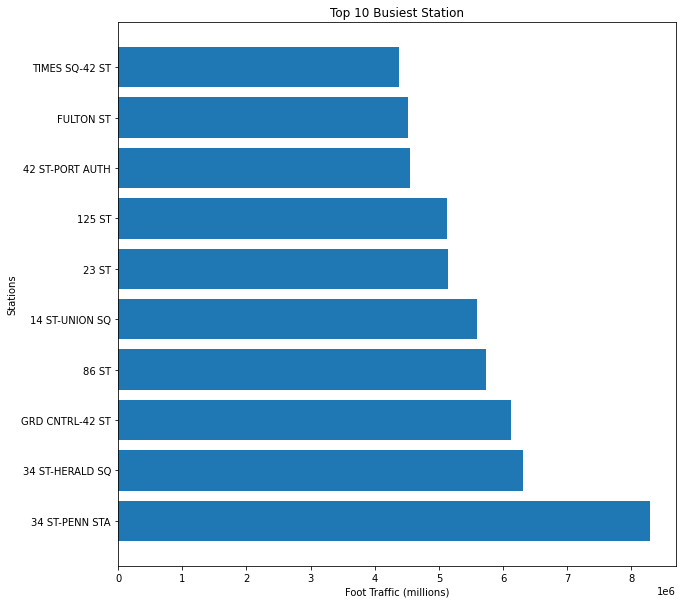

In [215]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = plt.barh(busy_10["station"],busy_10["total_traffic"])
plt.title("Top 10 Busiest Station")
plt.xlabel("Foot Traffic (millions)")
plt.ylabel("Stations")
plt.savefig("Top_10_Stations.jpg")

In [162]:
penn_station = df[df["station"] == "34 ST-PENN STA"]

In [177]:
penn_station["turnstiles"].nunique()

111

In [238]:
penn_station_df = penn_station.groupby(["turnstiles"]).agg({"total_traffic": sum}).sort_values("total_traffic", ascending=False).reset_index()

In [239]:
penn_station_df.head(10)

,turnstiles,total_traffic
0,R138R29300-03-04_34 ST-PENN STA,235635.0
1,N067R01200-05-00_34 ST-PENN STA,194128.0
2,N067R01200-05-01_34 ST-PENN STA,184551.0
3,N073R01302-00-01_34 ST-PENN STA,182315.0
4,R138R29300-00-02_34 ST-PENN STA,170209.0
5,R135R03101-00-03_34 ST-PENN STA,168462.0
6,R138R29300-00-01_34 ST-PENN STA,168245.0
7,R138R29300-00-00_34 ST-PENN STA,166535.0
8,R141R03100-00-00_34 ST-PENN STA,165704.0
9,N071R01300-00-00_34 ST-PENN STA,158983.0


In [240]:
penn_station_df.tail(10)

,turnstiles,total_traffic
101,N071R01300-03-01_34 ST-PENN STA,0.0
102,N071R01300-06-01_34 ST-PENN STA,0.0
103,N071R01300-03-03_34 ST-PENN STA,0.0
104,N071R01300-05-01_34 ST-PENN STA,0.0
105,N071R01300-05-00_34 ST-PENN STA,0.0
106,N071R01300-03-05_34 ST-PENN STA,0.0
107,N071R01300-03-04_34 ST-PENN STA,0.0
108,N071R01300-03-00_34 ST-PENN STA,0.0
109,N071R01300-03-02_34 ST-PENN STA,0.0
110,R138R29300-03-00_34 ST-PENN STA,-16.0


In [241]:
penn_station_df.describe()

,total_traffic
count,111.000000
mean,74603.342342
std,53669.724003
min,-16.000000
25%,36779.000000
50%,75215.000000
75%,101273.500000
max,235635.000000


In [242]:
penn_station_df["avg_foot_traffic"] = penn_station_df["total_traffic"] > penn_station_df["total_traffic"].mean()

In [250]:
penn_station_df.head()

,turnstiles,total_traffic,avg_foot_traffic
0,R138R29300-03-04_34 ST-PENN STA,235635.0,True
1,N067R01200-05-00_34 ST-PENN STA,194128.0,True
2,N067R01200-05-01_34 ST-PENN STA,184551.0,True
3,N073R01302-00-01_34 ST-PENN STA,182315.0,True
4,R138R29300-00-02_34 ST-PENN STA,170209.0,True


In [249]:
penn_station_df.tail()

,turnstiles,total_traffic,avg_foot_traffic
106,N071R01300-03-05_34 ST-PENN STA,0.0,False
107,N071R01300-03-04_34 ST-PENN STA,0.0,False
108,N071R01300-03-00_34 ST-PENN STA,0.0,False
109,N071R01300-03-02_34 ST-PENN STA,0.0,False
110,R138R29300-03-00_34 ST-PENN STA,-16.0,False


In [246]:
penn_station_df["avg_foot_traffic"].value_counts()

True     56
False    55
Name: avg_foot_traffic, dtype: int64

In [260]:
penn_station_df["utilization_rate"] = (penn_station_df["total_traffic"] / penn_station_df["total_traffic"].mean()) * 100

In [261]:
penn_station_df.head()

,turnstiles,total_traffic,avg_foot_traffic,utilization_rate
0,R138R29300-03-04_34 ST-PENN STA,235635.0,True,315.850460
1,N067R01200-05-00_34 ST-PENN STA,194128.0,True,260.213543
2,N067R01200-05-01_34 ST-PENN STA,184551.0,True,247.376316
3,N073R01302-00-01_34 ST-PENN STA,182315.0,True,244.379131
4,R138R29300-00-02_34 ST-PENN STA,170209.0,True,228.151976


In [262]:
penn_station_df.tail()

,turnstiles,total_traffic,avg_foot_traffic,utilization_rate
106,N071R01300-03-05_34 ST-PENN STA,0.0,False,0.000000
107,N071R01300-03-04_34 ST-PENN STA,0.0,False,0.000000
108,N071R01300-03-00_34 ST-PENN STA,0.0,False,0.000000
109,N071R01300-03-02_34 ST-PENN STA,0.0,False,0.000000
110,R138R29300-03-00_34 ST-PENN STA,-16.0,False,-0.021447


Text(0, 0.5, 'Turnstiles')

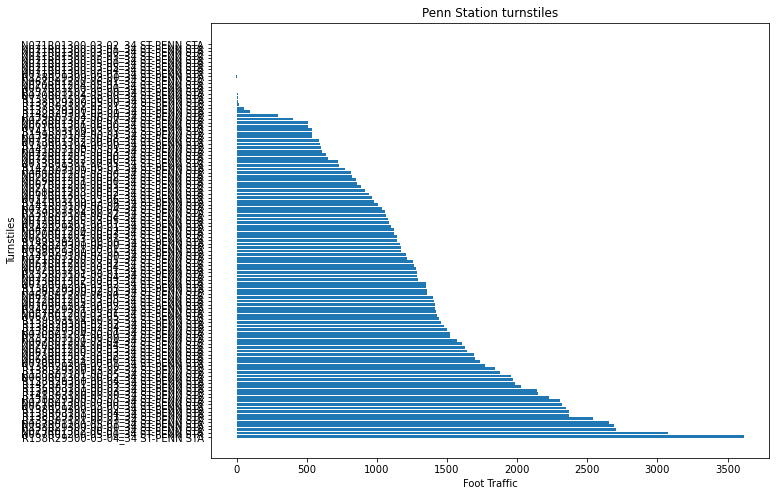

In [236]:
fig, ax = plt.subplots(figsize=(10, 8))
penn_station_plot = plt.barh(penn_station_df["turnstiles"], penn_station_df["total_traffic"])
plt.title("Penn Station turnstiles")
plt.xlabel("Foot Traffic")
plt.ylabel("Turnstiles")

In [218]:
import seaborn as sns

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Penn Station turnstiles')

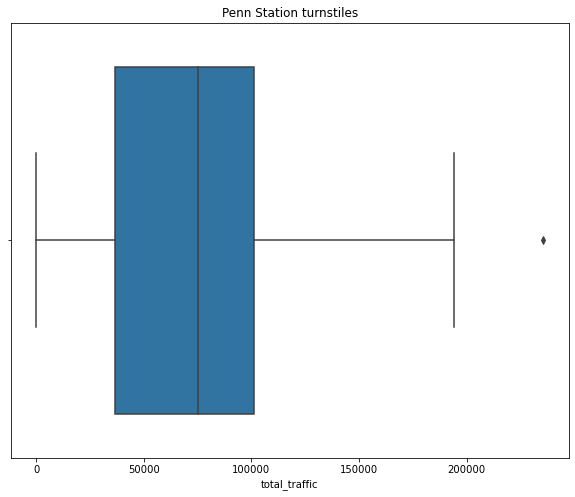

In [254]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(penn_station_df["total_traffic"])
plt.title("Penn Station turnstiles")

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


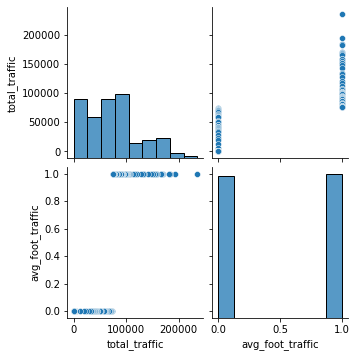

In [245]:
sns.pairplot(penn_station_df)